In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/sales.csv')
# df = pd.read_csv('sales.csv')

In [5]:
df.dropna(subset=['price'], inplace=True)

In [6]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [7]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year

train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

# 1. Data Transformation

<font color='red'>Assignment:</font> Build a transformer class to extract numerical features (**cost**, **weight**, **height**, **width**, and **depth**) and replace the missing values with the averages in train_raw.

In [8]:
class Transformer(object):
    
    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        df['weight'] = X.weight.map(self.weight2num)
        df['height'] = X.height.map(self.height2num)
        df['width'] = X.width.map(self.width2num)
        df['depth'] = X.depth.map(self.depth2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        df['weight'] = X.weight.map(self.weight2num)
        df['height'] = X.height.map(self.height2num)
        df['width'] = X.width.map(self.width2num)
        df['depth'] = X.depth.map(self.depth2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

    def cost2num(self, x):
        if type(x) == str: 
            x = x.strip('$').strip('k')
            return float(x)*1000
        else:
            return x
        
    def weight2num(self, x):
        if type(x) == str: 
            x = x.strip(' Kg').replace(' Ton ', '.')
            return float(x)
        else:
            return x
    
    def height2num(self, x):
        if type(x) == str: 
            x = x.strip(' meters')
            return float(x)
        else:
            return x
    
    def width2num(self, x):
        if type(x) == str: 
            x = x.strip(' cm')
            return float(x)
        else:
            return x
        
    def depth2num(self, x):
        if type(x) == str: 
            x = x.strip(' cm')
            return float(x)
        else:
            return x

<font color='red'>Assignment:</font> Wrap up the numerical transformer and MinMaxScaler as a pipeline for data transformation.  
**Note:** we don't need linear regression at this time.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<font color='red'>Assignment:</font> Transform **train_raw** and assign the output to a variable **X_train**.

In [10]:
from sklearn.decomposition import PCA

In [11]:
features = list(train_raw.columns)
target = 'price'
features.remove(target)

In [12]:
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)

In [24]:
X_train = train_raw[features]
y_train = train_raw[target].map(price2num)

X_test = test_raw[features]
y_test = test_raw[target].map(price2num)
X_train.shape

(2757, 11)

In [14]:
steps = [('ctf', Transformer()),
         ('rescale', MinMaxScaler()),
         ('pca', PCA(n_components = 5))]
pipe = Pipeline(steps)
X_train_pca = pipe.fit(X_train)

**Example:** import PCA from sklearn.

<font color='red'>Question:</font> What is PCA?

<font color='red'>Assignment:</font> Transform **X_train** using **PCA**. Assign the output to a variable **X_train_pca**.

### See above

# 2. Variance

<font color='red'>Assignment:</font> Plot **explained_variance_ratio_** in a bar chart.

In [15]:
X_train_pca.steps[2][1].explained_variance_ratio_

array([0.55526018, 0.26121939, 0.1567343 , 0.02338326, 0.00340286])

<BarContainer object of 5 artists>

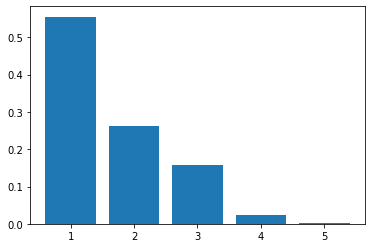

In [16]:
import matplotlib.pylab as plt
%matplotlib inline

plt.bar([1, 2, 3, 4, 5], X_train_pca.steps[2][1].explained_variance_ratio_)

<font color='red'>Question:</font> How principal components are ranked?

<font color='red'>Question:</font> What percentage of variance is kept in the first principle component?

### $55.53\%$

<font color='red'>Question:</font> How do the original features contribute to the first principle component?

In [17]:
X_train_pca.steps[2][1].components_

array([[ 0.02492705,  0.10472703, -0.63478509,  0.53524768,  0.54678031],
       [ 0.43986614,  0.83927528,  0.29723547,  0.08045036,  0.08551954],
       [ 0.89230057, -0.44853159, -0.05029566, -0.00729419, -0.00602029],
       [-0.09826037, -0.28800025,  0.70885791,  0.38082673,  0.50979626],
       [-0.0064041 , -0.02290227,  0.0607436 ,  0.74963688, -0.65862678]])

<font color='red'>Question:</font> What is the relationship between the principal components and original features? Is PCA a linear function?

<font color='red'>Assignment:</font> Plot the Variance versus the number of chosen principle components.

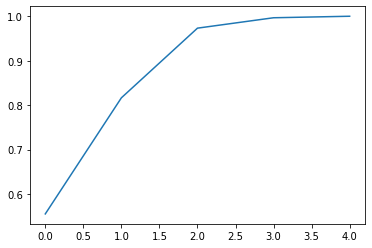

In [18]:
import numpy as np

plt.plot(np.cumsum(X_train_pca.steps[2][1].explained_variance_ratio_))

<font color='red'>Question:</font> How many principle components would you like to keep?

### 2

# 3. PCA Pipeline

<font color='red'>Assignment:</font> Build a pipeline to wrap up **Numerical Transformer**, **MinMaxScaler**, **PCA**, and **LinearRegression** to predict **price**. Find the best **n_components** for **PCA**.

In [19]:
steps = [('ctf', Transformer()),
         ('rescale', MinMaxScaler()),
         ('pca', PCA(n_components = 2)),
         ('lr', LinearRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

In [20]:
y_train_pred = model.predict(X_train)

In [21]:
y_test_pred = model.predict(X_test)

In [22]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.27e+05
train MSE: 3.65e+10
train R2: 0.143


In [23]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.60e+05
test MSE: 7.35e+10
test R2: 0.147


<font color='red'>Question:</font> What is the difference between PCA and SVD?